# ***An Exploratory Analysis of Rat Sightings In NYCs 5 Boroughs:***

 Creation of sets for further EDA
Preliminary: *Are the reports of rats equally distributed throughout the boroughs?*

>> Does one borough have more reports of rats per population than the other?
where are the most reports by year, month....

>>

Is there a correlation between the frequency of DSNY collection and the affect on the number of sightings?

Types of collections and the reported sightings.

sightings to frequency
sightings to population



Possible Further exploration into:

>Sightings to vendor

Litter baskets.

>Refuge stats compared to US

>Employment stats and truck violations.


#Reported Sightings
---Original data sourced from:

 https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe


> *additional sources added upon completion of ReadMe.txt master repository creation*


###Initial files joined/cleaned with Tableau Prep

==> step1_ratsightings = (Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv
Rat_Sightings.csv)


==> dsny_frequency = (DSNY_Districts, DSNY_Frequencies, NYC_Community_Board_dist,Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv)






Neighborhoods to zips

* Bronx Central Bronx 10453, 10457, 10460
* Bronx Park and Fordham 10458, 10467, 10468
* High Bridge and Morrisania 10451, 10452, 10456
* Hunts Point and Mott Haven 10454, 10455, 10459, 10474
* Kingsbridge and Riverdale 10463, 10471
* Northeast Bronx 10466, 10469, 10470, 10475
* Brooklyn Central Brooklyn 11212, 11213, 11216, 11233, 11238
* Southwest Brooklyn 11209, 11214, 11228
* Borough Park 11204, 11218, 11219, 11230
* Canarsie and Flatlands 11234, 11236, 11239
* Southern Brooklyn 11223, 11224, 11229, 11235
* Northwest Brooklyn 11201, 11205, 11215, 11217, 11231
* Flatbush 11203, 11210, 11225, 11226
* East New York and New Lots 11207, 11208
* Greenpoint 11211, 11222
* Sunset Park 11220, 11232
* Bushwick and Williamsburg 11206, 11221, 11237
* Manhattan Central Harlem 10026, 10027, 10030, 10037, 10039
* Chelsea and Clinton 10001, 10011, 10018, 10019, 10020, 10036
* East Harlem 10029, 10035
* Gramercy Park and Murray Hill 10010, 10016, 10017, 10022
* Greenwich Village and Soho 10012, 10013, 10014
* Lower Manhattan 10004, 10005, 10006, 10007, 10038, 10280
* Lower East Side 10002, 10003, 10009
* Upper East Side 10021, 10028, 10044, 10065, 10075, 10128
* Upper West Side 10023, 10024, 10025
* Inwood and Washington Heights 10031, 10032, 10033, 10034, 10040
* Queens Northeast Queens 11361, 11362, 11363, 11364
* North Queens 11354, 11355, 11356, 11357, 11358, 11359, 11360
* Central Queens 11365, 11366, 11367
* Jamaica 11412, 11423, 11432, 11433, 11434, 11435, 11436
* Northwest Queens 11101, 11102, 11103, 11104, 11105, 11106
* West Central Queens 11374, 11375, 11379, 11385
* Rockaways 11691, 11692, 11693, 11694, 11695, 11697
* Southeast Queens 11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429
* Southwest Queens 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421
* West Queens 11368, 11369, 11370, 11372, 11373, 11377, 11378
* Staten Island Port Richmond 10302, 10303, 10310
* South Shore 10306, 10307, 10308, 10309, 10312
* Stapleton and St. George 10301, 10304, 10305
* Mid-Island 10314

#Import

In [1]:
import os
import requests
import glob
import pandas as pd
!pip install geopandas
import geopandas as gpd
import numpy as np
import re # flexable way to search for matching text in strings Regular Expressions
import seaborn as sns # plotting and graphing, built upon the matplotlib library.
import matplotlib.pyplot as plt
#import geopy #ploting by location longitude and latitude

from math import pi
#from geopy.geocoders import Nominatim as nm
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()
#these populated on their own
from zmq.constants import THREAD_NAME_PREFIX
from pandas.core.groupby import groupby

#additional imports from notbook reference
import plotly as ply
import plotly.express as px
import plotly.io as pio
import scipy as sc
import sympy as sy
import matplotlib as matplot
import statistics as stat
### some imports are yet to be used...cleaning up and still exploring past analysis usage.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the csv(s)
missing_values=['nan','-', '']
rats = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/step1_ratsightings.csv', na_values = missing_values)
dsny = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/dsny_frequency.csv', na_values = missing_values)
#Unique Key as Index (after import check for duplicates then index unique key after sort of key and created date.)
#drop false leaves the index columns in when reindexing

#EDA DSNY

In [4]:
print('Info:', dsny.info())
print('top 5 rows:', dsny.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_code            606 non-null    int64  
 1   modzcta              606 non-null    int64  
 2   label                606 non-null    object 
 3   zcta                 606 non-null    object 
 4   district             606 non-null    object 
 5   districtcode         606 non-null    int64  
 6   section              606 non-null    object 
 7   community_board      606 non-null    object 
 8   council_district     606 non-null    int64  
 9   schedulecode         606 non-null    object 
 10  neighborhoods        606 non-null    object 
 11  nta                  606 non-null    object 
 12  cb_office_address    606 non-null    object 
 13  pop_est              606 non-null    int64  
 14  frequency            606 non-null    object 
 15  bulk_day1            606 non-null    obj

In [5]:
print('Rows, Columns:', dsny.shape)
#610, 31

Rows, Columns: (606, 34)


##Cleaning DSNY

In [6]:
dsny1 = dsny.drop_duplicates()
dsny1.shape == dsny.shape #(80475, 24)  (80481, 24)

True

In [7]:
dsny1.sort_values(by=['schedulecode','modzcta', 'post_code']).head(5)

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
390,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011A,...,"Mon, Wed, Fri",1,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
392,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011B,...,"Tue, Thu, Sat",2,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
284,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013A,...,"Mon, Wed, Fri",3,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
227,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013B,...,"Tue, Thu, Sat",4,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
560,10012,10012,10012,10012,MN02,102,MN021,Community Board 2,1,1021A,...,"Mon, Wed, Fri",5,0.000374,0.112141,40.727881,-73.998557,POINT (-73.998557 40.727881),MULTIPOLYGON (((-73.99684138499998 40.73736915...,5501,{9A68C37A-9489-4BCE-8D8C-580117BF1A87}


In [8]:
dsny1_sorted = pd.DataFrame(dsny1.sort_values(by=['schedulecode','modzcta', 'post_code'], ascending=True))

In [9]:
dsny1_sorted.reset_index(drop=True)

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
0,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011A,...,"Mon, Wed, Fri",1,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
1,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011B,...,"Tue, Thu, Sat",2,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
2,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013A,...,"Mon, Wed, Fri",3,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
3,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013B,...,"Tue, Thu, Sat",4,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
4,10012,10012,10012,10012,MN02,102,MN021,Community Board 2,1,1021A,...,"Mon, Wed, Fri",5,0.000374,0.112141,40.727881,-73.998557,POINT (-73.998557 40.727881),MULTIPOLYGON (((-73.99684138499998 40.73736915...,5501,{9A68C37A-9489-4BCE-8D8C-580117BF1A87}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,10309,10309,10309,10309,SI03,503,SI037,Community Board 3,51,5037D,...,"Tue, Fri",606,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}
602,10309,10309,10309,10309,SI03,503,SI037,Community Board 3,51,5037E,...,"Wed, Sat",607,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}
603,10309,10309,10309,10309,SI03,503,SI038,Community Board 3,51,5038C,...,"Mon, Thu",608,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}
604,10309,10309,10309,10309,SI03,503,SI038,Community Board 3,51,5038D,...,"Tue, Fri",609,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}


<Axes: >

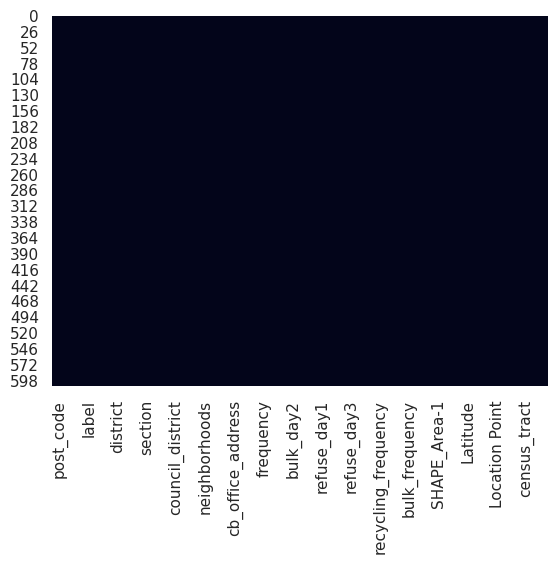

In [10]:
# check missing values in different columns via heatmap
sns.heatmap(dsny1.isnull(), cbar=False)

In [11]:
#dsny1.dropna()
#dropping columns
# dsny1 = dsny1.drop([ 'FID', 'FID-1', 'STATEPLANE_LABELX', 'STATEPLANE_LABELY', 'STATEPLANE_SNAPPEDX',
#        'STATEPLANE_SNAPPEDY', 'GlobalID'], axis=1)


In [12]:
dsny1.columns

Index(['post_code', 'modzcta', 'label', 'zcta', 'district', 'districtcode',
       'section', 'community_board', 'council_district', 'schedulecode',
       'neighborhoods', 'nta', 'cb_office_address', 'pop_est', 'frequency',
       'bulk_day1', 'bulk_day2', 'bulk_day3', 'refuse_day1', 'refuse_day2',
       'refuse_day3', 'refuse_frequency', 'recycling_frequency',
       'organic_frequency', 'bulk_frequency', 'ObjectID', 'SHAPE_Area-1',
       'SHAPE_Length-1', 'Latitude', 'Longitude', 'Location Point',
       'multipolygon-1', 'census_tract', 'GlobalID'],
      dtype='object')

In [13]:
dsny1.head()

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
0,11385,11385,11385,11385,QW05,405,QW051,Community Board 5,30,4051E,...,Wed,412,0.002083,0.223740,40.700875,-73.893734,POINT (-73.893734 40.700875),MULTIPOLYGON (((-73.88770340399998 40.73429958...,577,{498F4BE7-A870-4D7D-AAA4-22F88AC15FE6}
1,11232,11232,11232,11232,BKS07,307,BKS073,Community Board 7,38,3073D,...,"Tue, Fri",227,0.001030,0.287433,40.650316,-74.008166,POINT (-74.008166 40.650316),MULTIPOLYGON (((-73.98017304799998 40.66116290...,82,{AB947263-8808-4F66-942F-985F5BF265E9}
2,11209,11209,11209,"11209, 11425",BKS10,310,BKS102,Community Board 10,43,3102E,...,Wed,249,0.001101,0.140901,40.624842,-74.024525,POINT (-74.024525 40.624842),MULTIPOLYGON (((-74.03231229499994 40.64404745...,138,{6CBE9191-CF75-4470-A89E-DEAE0936AB58}
3,11357,11357,11357,"11351, 11357",QE07,407,QE072,Community Board 7,19,4072C,...,Thu,434,0.003254,0.442474,40.770483,-73.835639,POINT (-73.835639 40.770483),MULTIPOLYGON (((-73.83972970299999 40.76515397...,907,{600D03CD-21FC-40BB-8ED4-0AAC26E90B98}
4,11219,11219,11219,11219,BKS12,312,BKS122,Community Board 12,44,3122D,...,"Tue, Fri",278,0.000984,0.165920,40.629302,-73.998083,POINT (-73.998083 40.629302),MULTIPOLYGON (((-73.97139775099998 40.64826603...,192,{7D89729A-7373-401E-853A-5044EBEA8556}


In [14]:
dsny1['Location Point'] = dsny1['Location Point'].str.replace('POINT', '')

In [15]:
dsny.bulk_day1.unique()

array(['Wed', 'Tue', 'Thu', 'Unspecified', 'Mon', 'Fri', 'Sat'],
      dtype=object)

#EDA RATS

In [16]:
print('Info:', rats.info())
print('top 5 rows:', rats.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  210120 non-null  int64  
 1   created_date                210120 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 194098 non-null  object 
 4   location_type               210108 non-null  object 
 5   borough                     210118 non-null  object 
 6   incident_zip                210120 non-null  int64  
 7   community_board             210118 non-null  object 
 8   city                        207123 non-null  object 
 9   incident_address            210120 non-null  object 
 10  street_name                 210119 non-null  object 
 11  cross_street _1             191530 non-null  object 
 12  cross_street_2              191533 non-null  object 
 13  intersection_s

In [17]:
print('Rows, Columns:', rats.shape)
#80481, 25 without Unique Key as Index Rows, Columns: (208789, 28 ratsightings...no change in names or dropped collumns

Rows, Columns: (210120, 29)


Replacing the double checks(null)s

In [18]:
rats.index.is_unique

True

In [19]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [20]:
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,45747140,3/3/2020 6:15:50 AM,NaN,3/3/2020 6:15:50 AM,Commercial Building,BROOKLYN,11207,16 BROOKLYN,BROOKLYN,1746 BROADWAY,...,188102.0,40.682939,-73.910522,"(40.68293851538748, -73.91052156400578)",sightings,11207.0,11207,11207,91972.0,MULTIPOLYGON (((-73.90347629824663 40.67550542...
1,56989476,3/8/2023 2:27:46 AM,NaN,3/8/2023 2:27:46 AM,Construction Site,BROOKLYN,11215,06 BROOKLYN,BROOKLYN,205 14 STREET,...,182243.0,40.666891,-73.990293,"(40.666891259708756, -73.99029264560139)",sightings,11215.0,11215,11215,70156.0,MULTIPOLYGON (((-73.99822639169714 40.67120366...
2,46533529,6/18/2020 8:17:38 PM,NaN,NaN,1-2 Family Dwelling,BROOKLYN,11249,01 BROOKLYN,BROOKLYN,20 SOUTH 4 STREET,...,199125.0,40.713224,-73.967175,"(40.71322419170144, -73.96717477471884)",sightings,NaN,NaN,NaN,NaN,NaN
3,50422420,4/29/2021 5:18:50 PM,NaN,5/3/2021 6:30:22 AM,Other (Explain Below),MANHATTAN,10003,03 MANHATTAN,NEW YORK CITY,336 EAST 6 STREET,...,204137.0,40.726985,-73.987578,"(40.72698493398125, -73.98757795763353)",sightings,10003.0,10003,10003,54682.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...
4,38983405,4/19/2018 12:00:00 AM,05/19/2018 04:59:18 PM,4/19/2018 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11216,03 BROOKLYN,BROOKLYN,462 NOSTRAND AVENUE,...,188153.0,40.683102,-73.950132,"(40.683102482748794, -73.95013179905419)",sightings,11216.0,11216,11216,56308.0,MULTIPOLYGON (((-73.94773018706293 40.66971511...


In [21]:
#check min max report dates
min_date = min(rats['created_date'])
max_date = max(rats['created_date'])
print('Date range: ', min_date, ' - ', max_date)

Date range:  1/1/2010 11:20:45 AM  -  9/9/2022 9:59:51 AM


cant get index to stay... or is it me? reindex keeping this column that is sorted?

In [22]:
rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  210120 non-null  int64  
 1   created_date                210120 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 194098 non-null  object 
 4   location_type               210108 non-null  object 
 5   borough                     210118 non-null  object 
 6   incident_zip                210120 non-null  int64  
 7   community_board             210118 non-null  object 
 8   city                        207123 non-null  object 
 9   incident_address            210120 non-null  object 
 10  street_name                 210119 non-null  object 
 11  cross_street _1             191530 non-null  object 
 12  cross_street_2              191533 non-null  object 
 13  intersection_s

the dates still shows as objects.

In [23]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [24]:
#checking the index again no sort going up to reindex nesscisary?
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,45747140,3/3/2020 6:15:50 AM,NaN,3/3/2020 6:15:50 AM,Commercial Building,BROOKLYN,11207,16 BROOKLYN,BROOKLYN,1746 BROADWAY,...,188102.0,40.682939,-73.910522,"(40.68293851538748, -73.91052156400578)",sightings,11207.0,11207,11207,91972.0,MULTIPOLYGON (((-73.90347629824663 40.67550542...
1,56989476,3/8/2023 2:27:46 AM,NaN,3/8/2023 2:27:46 AM,Construction Site,BROOKLYN,11215,06 BROOKLYN,BROOKLYN,205 14 STREET,...,182243.0,40.666891,-73.990293,"(40.666891259708756, -73.99029264560139)",sightings,11215.0,11215,11215,70156.0,MULTIPOLYGON (((-73.99822639169714 40.67120366...
2,46533529,6/18/2020 8:17:38 PM,NaN,NaN,1-2 Family Dwelling,BROOKLYN,11249,01 BROOKLYN,BROOKLYN,20 SOUTH 4 STREET,...,199125.0,40.713224,-73.967175,"(40.71322419170144, -73.96717477471884)",sightings,NaN,NaN,NaN,NaN,NaN
3,50422420,4/29/2021 5:18:50 PM,NaN,5/3/2021 6:30:22 AM,Other (Explain Below),MANHATTAN,10003,03 MANHATTAN,NEW YORK CITY,336 EAST 6 STREET,...,204137.0,40.726985,-73.987578,"(40.72698493398125, -73.98757795763353)",sightings,10003.0,10003,10003,54682.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...
4,38983405,4/19/2018 12:00:00 AM,05/19/2018 04:59:18 PM,4/19/2018 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11216,03 BROOKLYN,BROOKLYN,462 NOSTRAND AVENUE,...,188153.0,40.683102,-73.950132,"(40.683102482748794, -73.95013179905419)",sightings,11216.0,11216,11216,56308.0,MULTIPOLYGON (((-73.94773018706293 40.66971511...


In [25]:
rats['incident_zip'].nlargest(n=15)

19435     11697
25640     11697
48480     11697
135054    11697
75003     11695
1312      11694
1485      11694
2118      11694
2267      11694
3920      11694
3956      11694
4757      11694
6754      11694
9910      11694
10003     11694
Name: incident_zip, dtype: int64

##Cleaning Rats

In [26]:
rats.sort_values(by=['incident_zip']).head(5)

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
141379,29057903,10/12/2014 12:00:00 AM,11/11/2014 03:29:43 PM,10/15/2014 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK SOUTH,...,218237.0,40.765684,-73.976235,"(40.765684114893894, -73.9762353119456)",sightings,NaN,NaN,NaN,NaN,NaN
12385,34335842,9/16/2016 12:00:00 AM,10/16/2016 12:57:17 PM,10/18/2016 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,LENOX AVENUE,...,229819.0,40.797466,-73.951700,"(40.7974659648698, -73.95170030179558)",sightings,NaN,NaN,NaN,NaN,NaN
133704,37791806,11/27/2017 12:00:00 AM,12/27/2017 06:10:34 PM,12/1/2017 12:00:00 AM,Other (Explain Below),MANHATTAN,83,10 MANHATTAN,CENTRAL PARK,110 LENOX AVENUE,...,229858.0,40.797573,-73.951570,"(40.79757295469069, -73.95157020157765)",sightings,NaN,NaN,NaN,NaN,NaN
32772,40031244,8/17/2018 12:00:00 AM,09/16/2018 12:13:48 AM,8/23/2018 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK WEST,...,221368.0,40.774278,-73.977370,"(40.77427812337319, -73.9773695445951)",sightings,NaN,NaN,NaN,NaN,NaN
140972,28881497,9/15/2014 12:00:00 AM,10/15/2014 05:12:53 PM,10/8/2014 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK WEST,...,223262.0,40.779476,-73.973573,"(40.7794758468835, -73.97357287287964)",sightings,NaN,NaN,NaN,NaN,NaN


In [27]:
rats_sorted = rats.sort_values(by=['created_date'], ascending=True)

In [28]:
rats_sorted.reset_index(drop=True)

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,15633054,1/1/2010 11:20:45 AM,01/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,208930.0,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",sightings,11365.0,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...
1,15634275,1/1/2010 11:46:51 PM,01/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,190346.0,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)",sightings,11201.0,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...
2,15633896,1/1/2010 12:11:51 PM,01/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,233426.0,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)",sightings,10027.0,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...
3,15633897,1/1/2010 12:12:04 PM,01/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,250983.0,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)",sightings,10458.0,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...
4,15633828,1/1/2010 2:15:27 PM,01/31/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,170864.0,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)",sightings,11218.0,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,55348031,9/9/2022 9:38:01 PM,NaN,9/9/2022 9:38:01 PM,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,204305.0,40.727447,-74.002630,"(40.72744669308238, -74.00263018635036)",sightings,10012.0,10012,10012,23411.0,MULTIPOLYGON (((-74.00408405811187 40.72537431...
210116,55351913,9/9/2022 9:39:20 PM,NaN,9/9/2022 9:39:20 PM,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,231932.0,40.803268,-73.958115,"(40.80326808253412, -73.9581147002217)",sightings,10026.0,10026,10026,39363.0,MULTIPOLYGON (((-73.96200720826798 40.80550908...
210117,55348032,9/9/2022 9:45:11 AM,NaN,9/9/2022 9:45:11 AM,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,217724.0,40.764278,-73.992094,"(40.764278242124526, -73.99209424765353)",sightings,10019.0,multiple,"10019, 10020, 10103, 10111, 10112",43703.0,MULTIPOLYGON (((-74.00114791977168 40.76202777...
210118,55346704,9/9/2022 9:50:04 AM,NaN,9/9/2022 9:50:04 AM,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,204076.0,40.726817,-73.985337,"(40.7268172403236, -73.98533748091528)",sightings,10009.0,10009,10009,57925.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...


In [29]:
print('Borough Value counts after dropping columns and nulls:\n',rats_sorted['borough'].value_counts())

Borough Value counts after dropping columns and nulls:
 BROOKLYN         76566
MANHATTAN        54747
BRONX            39461
QUEENS           31107
STATEN ISLAND     8237
Name: borough, dtype: int64


In [30]:
# Percentage by lambda and DataFrame.apply() method.
#  rat13 =   rat1.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

In [31]:
rats_sorted.loc[~rats_sorted.index.duplicated(), :].head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
173104,15633054,1/1/2010 11:20:45 AM,01/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,208930.0,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",sightings,11365.0,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...
38908,15634275,1/1/2010 11:46:51 PM,01/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,190346.0,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)",sightings,11201.0,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...
172919,15633896,1/1/2010 12:11:51 PM,01/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,233426.0,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)",sightings,10027.0,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...
61527,15633897,1/1/2010 12:12:04 PM,01/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,250983.0,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)",sightings,10458.0,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...
175959,15633828,1/1/2010 2:15:27 PM,01/31/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,170864.0,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)",sightings,11218.0,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...


### Dropping duplicates/ columns/ nulls

In [32]:
rat1 = rats_sorted.drop_duplicates()
rat1.shape == rats_sorted.shape

True

In [33]:
rat1 = pd.DataFrame(rat1.sort_values(['created_date','unique_key'], ascending=True))

<Axes: >

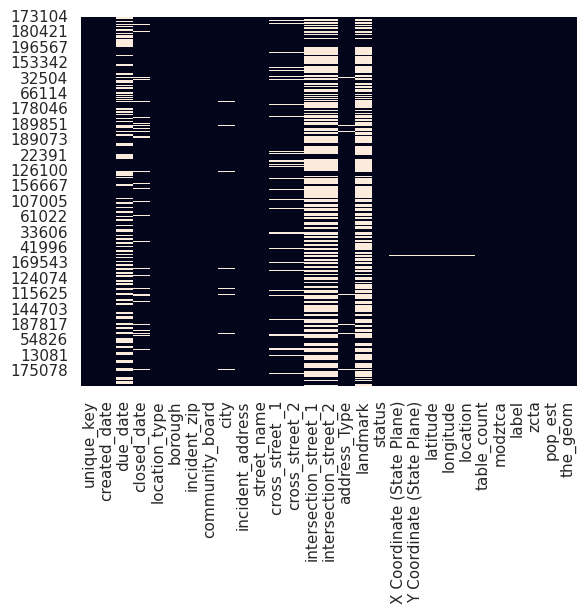

In [34]:
#dropping columns that are unneeded or too many null values
# rat1 = rat1.drop(['cities_acceptable_irs', 'irs_estimated_population', 'landmark', 'marg_error'], axis=1)
# check missing values in different columns via heatmap
sns.heatmap(rat1.isnull(), cbar=False)

In [35]:
rat1.columns

Index(['unique_key', 'created_date', 'due_date', 'closed_date',
       'location_type', 'borough', 'incident_zip', 'community_board', 'city',
       'incident_address', 'street_name', 'cross_street _1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_Type',
       'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location',
       'table_count', 'modztca', 'label', 'zcta', 'pop_est', 'the_geom'],
      dtype='object')

####Dropping final nulls for analysis

In [36]:
rat1.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [37]:
missing_counts =   rat1.isnull().sum().sort_values(ascending = False)
percent = (  rat1.isnull().sum()*100/  rat1.shape[0]).sort_values(ascending = False)

In [38]:
missing_rat1 = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print(f' Missing values: \n{missing_rat1}')

 Missing values: 
                            Counts          %
landmark                    126987  60.435465
intersection_street_1       117884  56.103179
intersection_street_2       117848  56.086046
due_date                     88995  42.354369
cross_street _1              18590   8.847325
cross_street_2               18587   8.845898
closed_date                  16022   7.625167
address_Type                  4444   2.114982
city                          2997   1.426328
latitude                      1537   0.731487
location                      1537   0.731487
longitude                     1537   0.731487
X Coordinate (State Plane)    1537   0.731487
Y Coordinate (State Plane)    1537   0.731487
modztca                       1079   0.513516
label                         1079   0.513516
zcta                          1079   0.513516
pop_est                       1079   0.513516
the_geom                      1079   0.513516
location_type                   12   0.005711
community_board 

need to remove o values in population

In [39]:
# drop duplicate data (== gives the boolean value)
rat2 = rat1.drop_duplicates()
rat2.shape == rat1.shape

True

###pd.datetime/ created YQMWD

In [40]:
#Converting the date column to its specified data type
rat1['created_date'] = pd.to_datetime(rat1['created_date'])

In [41]:
# Creating 4 new columns for easy querying
rat1['year']= rat1.created_date.dt.year
rat1['quarter']= rat1.created_date.dt.quarter
rat1['month'] = rat1.created_date.dt.month
rat1['weekday'] = rat1.created_date.dt.weekday
rat1['day'] = rat1.created_date.dt.day
rat1['hour'] = rat1.created_date.dt.hour
rat1.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,label,zcta,pop_est,the_geom,year,quarter,month,weekday,day,hour
173104,15633054,2010-01-01 11:20:45,01/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...,2010,1,1,4,1,11
38908,15634275,2010-01-01 23:46:51,01/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...,2010,1,1,4,1,23
172919,15633896,2010-01-01 12:11:51,01/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...,2010,1,1,4,1,12
61527,15633897,2010-01-01 12:12:04,01/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...,2010,1,1,4,1,12
175959,15633828,2010-01-01 14:15:27,01/31/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...,2010,1,1,4,1,14


#VALUES

In [42]:
#check min max crash dates
min_date = min(rat1['created_date'])
max_date = max(rat1['created_date'])
print(f'Date range:  {min_date}  -  {max_date}')

Date range:  2010-01-01 08:29:58  -  2023-07-03 02:05:32


In [43]:
# Top incident ZIP codes by created date
top_zip_by_created_date = rat1.groupby('created_date')['incident_zip'].apply(lambda x: x.value_counts().idxmax())

# Top incident ZIP codes by year
top_zip_by_year = rat1.groupby('year')['incident_zip'].apply(lambda x: x.value_counts().idxmax())
# Top incident ZIP codes by quarter
top_zip_by_quarter = rat1.groupby('quarter')['incident_zip'].apply(lambda x: x.value_counts().idxmax())

# Top incident ZIP codes by month
top_zip_by_month = rat1.groupby('month')['incident_zip'].apply(lambda x: x.value_counts().idxmax())
# Top incident ZIP codes by weekday
top_zip_by_weekday = rat1.groupby('weekday')['incident_zip'].apply(lambda x: x.value_counts().idxmax())

# Top incident ZIP codes by day of the week
top_zip_by_day_of_week = rat1.groupby('day')['incident_zip'].apply(lambda x: x.value_counts().idxmax())

# Top incident ZIP codes by hour
top_zip_by_hour = rat1.groupby('hour')['incident_zip'].apply(lambda x: x.value_counts().idxmax())

# Display the results
print("Top incident ZIP code by created date:")
print(top_zip_by_created_date)
print()

print("Top incident ZIP code by year:")
print(top_zip_by_year)
print()

print("Top incident ZIP code by quarter:")
print(top_zip_by_quarter)
print()

print("Top incident ZIP code by month:")
print(top_zip_by_month)
print()

print("Top incident ZIP code by weekday:")
print(top_zip_by_weekday)
print()

print("Top incident ZIP code by day of the week:")
print(top_zip_by_day_of_week)
print()

print("Top incident ZIP code by hour:")
print(top_zip_by_hour)
print()

Top incident ZIP code by created date:
created_date
2010-01-01 08:29:58    11206
2010-01-01 11:20:45    11365
2010-01-01 12:11:51    10027
2010-01-01 12:12:04    10458
2010-01-01 14:15:27    11218
                       ...  
2023-07-02 23:04:44    11201
2023-07-02 23:27:12    11106
2023-07-03 00:19:54    10037
2023-07-03 01:08:50    10038
2023-07-03 02:05:32    10021
Name: incident_zip, Length: 103613, dtype: int64

Top incident ZIP code by year:
year
2010    11221
2011    11221
2012    11221
2013    11221
2014    11221
2015    11216
2016    11221
2017    11238
2018    10025
2019    11238
2020    10025
2021    11216
2022    10025
2023    11385
Name: incident_zip, dtype: int64

Top incident ZIP code by quarter:
quarter
1    10025
2    11216
3    11221
4    10025
Name: incident_zip, dtype: int64

Top incident ZIP code by month:
month
1     10025
2     10025
3     10025
4     11216
5     11221
6     11216
7     11221
8     11216
9     11221
10    11238
11    10025
12    11221
Name: incid

YEARS... limit by years then months. 2022 and 2023 first

In [44]:
rat1['street_name'].fillna('Unspecified', inplace=True)

In [45]:
# Top street name by year
top_street = rat1.groupby(['year','quarter','month', 'created_date','weekday', 'community_board','incident_zip'])['street_name'].apply(lambda x: x.value_counts().idxmax())
print("Top street name by year...:")
print(top_street)
print()

Top street name by year...:
year  quarter  month  created_date         weekday  community_board        incident_zip
2010  1        1      2010-01-01 08:29:58  4        03 BROOKLYN            11206                PULASKI STREET
                      2010-01-01 11:20:45  4        07 QUEENS              11365                    159 STREET
                      2010-01-01 12:11:51  4        10 MANHATTAN           10027               WEST 120 STREET
                      2010-01-01 12:12:04  4        06 BRONX               10458               LORILLARD PLACE
                      2010-01-01 14:15:27  4        12 BROOKLYN            11218           CONEY ISLAND AVENUE
                                                                                                  ...         
2023  3        7      2023-07-02 23:04:44  6        02 BROOKLYN            11201               MONTAGUE STREET
                      2023-07-02 23:27:12  6        01 QUEENS              11106                     32 STR

In [47]:
# Top incident address by year
top_addresses = rat1.groupby(['year','quarter','month', 'created_date','weekday', 'community_board','incident_zip'])['incident_address'].apply(lambda x: x.value_counts().idxmax())

print("Top incident address by year...:")
print(top_addresses)
print()

Top incident address by year...:
year  quarter  month  created_date         weekday  community_board        incident_zip
2010  1        1      2010-01-01 08:29:58  4        03 BROOKLYN            11206                202 PULASKI STREET
                      2010-01-01 11:20:45  4        07 QUEENS              11365                  59-13 159 STREET
                      2010-01-01 12:11:51  4        10 MANHATTAN           10027               317 WEST 120 STREET
                      2010-01-01 12:12:04  4        06 BRONX               10458              2356 LORILLARD PLACE
                      2010-01-01 14:15:27  4        12 BROOKLYN            11218           900 CONEY ISLAND AVENUE
                                                                                                    ...           
2023  3        7      2023-07-02 23:04:44  6        02 BROOKLYN            11201               134 MONTAGUE STREET
                      2023-07-02 23:27:12  6        01 QUEENS             

In [48]:
# Top incident ZIP codes by year
top_zip = rat1.groupby(['year','quarter','month', 'created_date','weekday', 'community_board'])['incident_zip'].apply(lambda x: x.value_counts().idxmax())
print("Top incident ZIP code by year, month:")
print(top_zip)
print()

Top incident ZIP code by year, month:
year  quarter  month  created_date         weekday  community_board      
2010  1        1      2010-01-01 08:29:58  4        03 BROOKLYN              11206
                      2010-01-01 11:20:45  4        07 QUEENS                11365
                      2010-01-01 12:11:51  4        10 MANHATTAN             10027
                      2010-01-01 12:12:04  4        06 BRONX                 10458
                      2010-01-01 14:15:27  4        12 BROOKLYN              11218
                                                                             ...  
2023  3        7      2023-07-02 23:04:44  6        02 BROOKLYN              11201
                      2023-07-02 23:27:12  6        01 QUEENS                11106
                      2023-07-03 00:19:54  0        10 MANHATTAN             10037
                      2023-07-03 01:08:50  0        01 MANHATTAN             10038
                      2023-07-03 02:05:32  0        Unspec

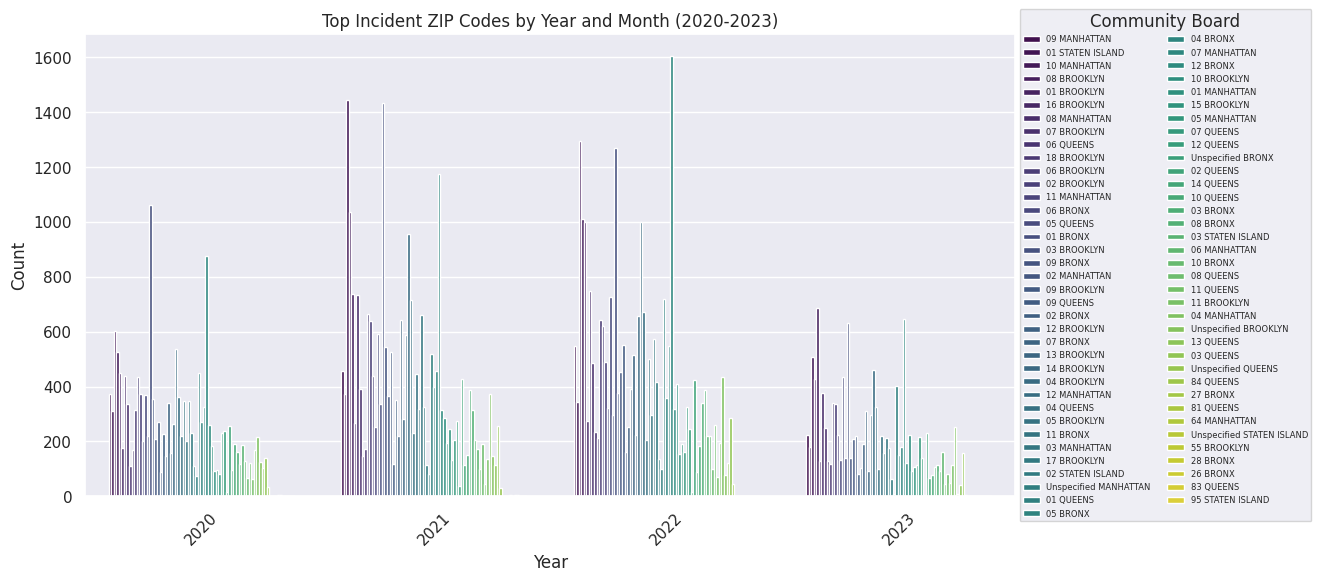

In [49]:
# Reset the index to convert the series to a DataFrame
top_zip_df = top_zip.reset_index()

# Filter the data for the years 2020 to 2023
filtered_top_zip_df = top_zip_df[top_zip_df['year'].between(2020, 2023)]

# Plot the count of incident ZIP codes by year, month, and community board
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_top_zip_df, x='year', hue='community_board', palette='viridis')

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top Incident ZIP Codes by Year and Month (2020-2023)')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6, ncol=2, title='Community Board')

# Display the plot
plt.show()

In [50]:
top_10_unique_zips = rat1['incident_zip'].value_counts().nlargest(10).index.tolist()

In [51]:
top_10_unique_zips

[11221, 10025, 11216, 11238, 11233, 11226, 11237, 11385, 10467, 11207]

In [52]:
top_values = rat1.nlargest(10, 'incident_zip', keep='first')

In [53]:
top_values

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,label,zcta,pop_est,the_geom,year,quarter,month,weekday,day,hour
135054,37457172,2017-10-17 00:00:00,11/16/2017 03:51:55 PM,1/2/2018 12:00:00 AM,1-2 Family Mixed Use Building,QUEENS,11697,14 QUEENS,BREEZY POINT,232 HILLSIDE AVENUE,...,11697,11697,3540.0,MULTIPOLYGON (((-73.86288509369598 40.57605877...,2017,4,10,1,17,0
19435,46672443,2020-06-28 10:27:01,NaN,NaN,1-2 Family Dwelling,QUEENS,11697,14 QUEENS,BREEZY POINT,20 DORIS LANE,...,11697,11697,3540.0,MULTIPOLYGON (((-73.86288509369598 40.57605877...,2020,2,6,6,28,10
25640,39867593,2018-07-29 00:00:00,08/28/2018 11:51:08 AM,1/16/2019 12:00:00 AM,Commercial Building,QUEENS,11697,Unspecified QUEENS,BREEZY POINT,1 BEACH 193RD ST,...,11697,11697,3540.0,MULTIPOLYGON (((-73.86288509369598 40.57605877...,2018,3,7,6,29,0
48480,47549267,2020-09-12 04:52:01,NaN,NaN,Commercial Building,QUEENS,11697,14 QUEENS,BREEZY POINT,202-30 ROCKAWAY POINT BOULEVARD,...,11697,11697,3540.0,MULTIPOLYGON (((-73.86288509369598 40.57605877...,2020,3,9,5,12,4
75003,46076535,2020-04-27 10:38:00,NaN,4/27/2020 10:38:00 AM,Commercial Building,QUEENS,11695,84 QUEENS,QUEENS,402 BEACH 169 STREET,...,NaN,NaN,NaN,NaN,2020,2,4,0,27,10
10003,27265851,2014-01-27 00:00:00,02/26/2014 11:22:26 AM,1/31/2014 2:20:20 PM,1-2 Family Dwelling,QUEENS,11694,Unspecified QUEENS,ROCKAWAY PARK,149-25 ROCKAWAY BEACH BOULEVARD,...,11694,11694,21354.0,MULTIPOLYGON (((-73.86495602260939 40.56663006...,2014,1,1,0,27,0
124111,56656934,2023-01-29 14:57:16,NaN,NaN,3+ Family Apt. Building,QUEENS,11694,14 QUEENS,FAR ROCKAWAY,BEACH CHANNEL,...,11694,11694,21354.0,MULTIPOLYGON (((-73.86495602260939 40.56663006...,2023,1,1,6,29,14
104399,32368971,2016-01-08 00:00:00,02/07/2016 05:53:03 PM,1/19/2016 12:00:00 AM,3+ Family Apt. Building,QUEENS,11694,14 QUEENS,ROCKAWAY PARK,1 BEACH 105 STREET,...,11694,11694,21354.0,MULTIPOLYGON (((-73.86495602260939 40.56663006...,2016,1,1,4,8,0
80021,24756091,2013-01-09 00:00:00,02/08/2013 11:02:46 AM,1/23/2013 9:57:21 AM,1-2 Family Dwelling,QUEENS,11694,Unspecified QUEENS,ROCKAWAY PARK,185 BEACH 117 STREET,...,11694,11694,21354.0,MULTIPOLYGON (((-73.86495602260939 40.56663006...,2013,1,1,2,9,0
25745,49502668,2021-01-09 21:10:59,NaN,1/9/2021 9:10:59 PM,1-2 Family Dwelling,QUEENS,11694,14 QUEENS,ROCKAWAY PARK,177 BEACH 134 STREET,...,11694,11694,21354.0,MULTIPOLYGON (((-73.86495602260939 40.56663006...,2021,1,1,5,9,21


In [54]:
dsny1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 605
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_code            606 non-null    int64  
 1   modzcta              606 non-null    int64  
 2   label                606 non-null    object 
 3   zcta                 606 non-null    object 
 4   district             606 non-null    object 
 5   districtcode         606 non-null    int64  
 6   section              606 non-null    object 
 7   community_board      606 non-null    object 
 8   council_district     606 non-null    int64  
 9   schedulecode         606 non-null    object 
 10  neighborhoods        606 non-null    object 
 11  nta                  606 non-null    object 
 12  cb_office_address    606 non-null    object 
 13  pop_est              606 non-null    int64  
 14  frequency            606 non-null    object 
 15  bulk_day1            606 non-null    obj

#**series count weekday**
Monday = 0

Tuesday = 1

Wednesday = 2, and so on

#RATS>>DSNY

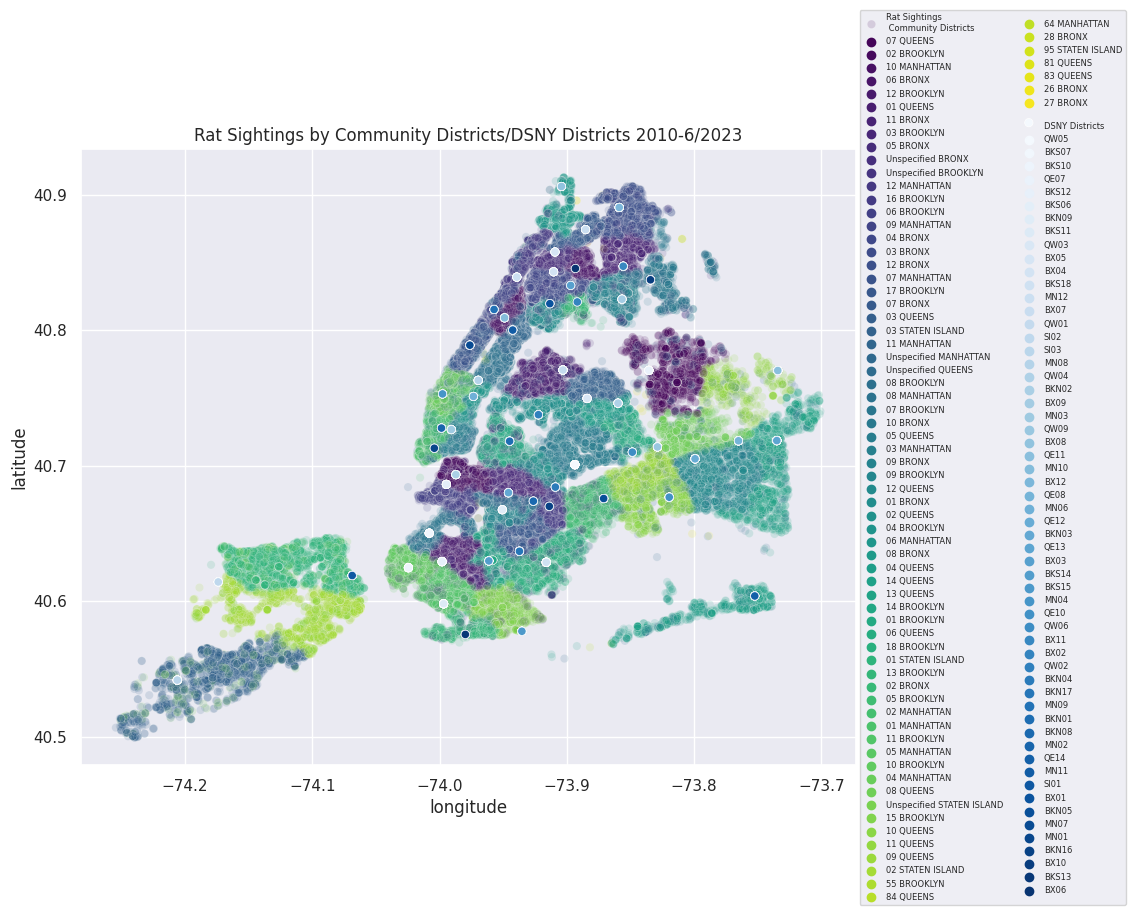

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=rat1, x='longitude', y='latitude', hue='community_board', alpha=0.15, palette="viridis", label='Rat Sightings\n Community Districts', ax=ax)
sns.scatterplot(data=dsny1, x='Longitude', y='Latitude', hue= 'district', palette="Blues" ,label='\nDSNY Districts', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6, ncol=2)
ax.set_title('Rat Sightings by Community Districts/DSNY Districts 2010-6/2023')
plt.show()

##DSNY new dataframes / and bools

In [56]:
dsny1_dist = dsny1.district.unique()
print(f'DSNY districts: {dsny1_dist}')

DSNY districts: ['QW05' 'BKS07' 'BKS10' 'QE07' 'BKS12' 'BKS06' 'BKN09' 'BKS11' 'QW03'
 'BX05' 'BX04' 'BKS18' 'MN12' 'BX07' 'QW01' 'SI02' 'SI03' 'MN08' 'QW04'
 'BKN02' 'BX09' 'MN03' 'QW09' 'BX08' 'QE11' 'MN10' 'BX12' 'QE08' 'MN06'
 'QE12' 'BKN03' 'QE13' 'BX03' 'BKS14' 'BKS15' 'MN04' 'QE10' 'QW06' 'BX11'
 'BX02' 'QW02' 'BKN04' 'BKN17' 'MN09' 'BKN01' 'BKN08' 'MN02' 'QE14' 'MN11'
 'SI01' 'BX01' 'BKN05' 'MN07' 'MN01' 'BKN16' 'BX10' 'BKS13' 'BX06']


In [57]:
BRX = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') |
                      (dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') |
                      (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') |
                      (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') | (dsny1['district'] == 'MN12') | (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') | (dsny1['district'] == 'QW02') |
                      (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') | (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') | (dsny1['district'] == 'QE10') | (dsny1['district'] == 'QE11') |
                      (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') | (dsny1['district'] == 'QE14') ].index)
BRX_dsny = pd.DataFrame(BRX)
print(BRX_dsny.district.unique())


['BX05' 'BX04' 'BX07' 'BX09' 'BX08' 'BX12' 'BX03' 'BX11' 'BX02' 'BX01'
 'BX10' 'BX06']


In [58]:
 BKN = dsny1.drop(dsny1[(dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') | (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05')|
                       (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') |
                       (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') | (dsny1['district'] == 'MN12') | (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') | (dsny1['district'] == 'QW02') | (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') |
                       (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') | (dsny1['district'] == 'QE10') | (dsny1['district'] == 'QE11') | (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') |
                       (dsny1['district'] == 'QE14') | (dsny1['district'] == 'BX01') | (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') |
                       (dsny1['district'] == 'BX08') | (dsny1['district'] == 'BX09') | (dsny1['district'] == 'BX10') | (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12')].index)
BKN_dsny = pd.DataFrame(BKN)
print(BKN_dsny.district.unique())

['BKS07' 'BKS10' 'BKS12' 'BKS06' 'BKN09' 'BKS11' 'BKS18' 'BKN02' 'BKN03'
 'BKS14' 'BKS15' 'BKN04' 'BKN17' 'BKN01' 'BKN08' 'BKN05' 'BKN16' 'BKS13']


In [59]:
QNS = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') |
                      (dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') | (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05') | (dsny1['district'] == 'MN06') |
                      (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') |
                      (dsny1['district'] == 'MN12') | (dsny1['district'] == 'BX01') | (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') | (dsny1['district'] == 'BX08') |
                      (dsny1['district'] == 'BX09') | (dsny1['district'] == 'BX10') | (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12')].index)
QNS_dsny = pd.DataFrame(QNS)
print(QNS_dsny.district.unique())

['QW05' 'QE07' 'QW03' 'QW01' 'QW04' 'QW09' 'QE11' 'QE08' 'QE12' 'QE13'
 'QE10' 'QW06' 'QW02' 'QE14']


In [60]:
SI = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') | (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05') | (dsny1['district'] == 'BX01') |
                      (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') | (dsny1['district'] == 'BX08') | (dsny1['district'] == 'BX09') |
                      (dsny1['district'] == 'BX10') | (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') |
                      (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') | (dsny1['district'] == 'MN12') | (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') |
                      (dsny1['district'] == 'QW02') | (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') | (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') | (dsny1['district'] == 'QE10') |
                      (dsny1['district'] == 'QE11') | (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') | (dsny1['district'] == 'QE14')].index)
SI_dsny = pd.DataFrame(SI)
print(SI_dsny.district.unique())

['SI02' 'SI03' 'SI01']


In [61]:
NYC = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') |
                      (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') | (dsny1['district'] == 'QW02') | (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') | (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') |
                      (dsny1['district'] == 'QE10') | (dsny1['district'] == 'QE11') | (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') | (dsny1['district'] == 'QE14') | (dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'BX01') |
                      (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') | (dsny1['district'] == 'BX08') | (dsny1['district'] == 'BX09') | (dsny1['district'] == 'BX10') |
                      (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12')].index)
NYC_dsny = pd.DataFrame(NYC)
print(NYC_dsny.district.unique())

['MN12' 'MN08' 'MN03' 'MN10' 'MN06' 'MN04' 'MN09' 'MN02' 'MN11' 'MN07'
 'MN01']


In [62]:
NYC_dsny.head()

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
12,10032,10032,10032,10032,MN12,112,MN124,Community Board 12,10,1124A,...,"Mon, Wed, Fri",79,0.000774,0.173013,40.839328,-73.939339,(-73.939339 40.839328),MULTIPOLYGON (((-73.93445382699997 40.83598924...,251,{20BCB427-2BFD-4200-B9FA-55B29DDA0D12}
22,10022,10022,10022,"10022, 10152, 10153, 10154",MN08,108,MN085,Community Board 8,4,1085A,...,"Mon, Wed, Fri",53,0.000545,0.156954,40.763117,-73.969641,(-73.969641 40.763117),MULTIPOLYGON (((-73.94383399899993 40.78286736...,11402,{4DB089BD-7857-4D3F-A153-3F9C9630CB6A}
29,10003,10003,10003,10003,MN03,103,MN033,Community Board 3,2,1033A,...,"Mon, Wed, Fri",15,0.000464,0.095198,40.726785,-73.990807,(-73.990807 40.726785),MULTIPOLYGON (((-73.98878076099999 40.73397366...,38,{00DDE1BA-E2ED-475A-B245-BBFD6C184D9B}
35,10027,10027,10027,"10027, 10115",MN10,110,MN103,Community Board 10,9,1103A,...,"Mon, Wed, Fri",63,0.000388,0.107704,40.809259,-73.948979,(-73.948979 40.809259),MULTIPOLYGON (((-73.93445382699997 40.83598924...,222,{578C075F-A811-4D3A-AEEF-073FC8DCE04C}
41,10017,10017,10017,"10017, 10165, 10167, 10168, 10169, 10170, 1017...",MN06,106,MN063,Community Board 6,4,1063A,...,"Mon, Wed, Fri",33,0.000383,0.125482,40.751238,-73.973458,(-73.973458 40.751238),MULTIPOLYGON (((-73.96213702799997 40.75458149...,88,{4AD796F7-6E00-4FA4-A101-DEA855E3FBA2}


##rat sightings ...needs converted to dfs? check outputs

In [63]:
rat1.columns

Index(['unique_key', 'created_date', 'due_date', 'closed_date',
       'location_type', 'borough', 'incident_zip', 'community_board', 'city',
       'incident_address', 'street_name', 'cross_street _1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_Type',
       'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location',
       'table_count', 'modztca', 'label', 'zcta', 'pop_est', 'the_geom',
       'year', 'quarter', 'month', 'weekday', 'day', 'hour'],
      dtype='object')

In [64]:
rat1_dist = rat1['community_board'].dropna().unique()

# Create a new DataFrame with all columns for the unique values of 'community_board'
rat1_dist2 = rat1[rat1['community_board'].isin(rat1_dist)].copy()

print(f'Community Board districts: \n{rat1_dist2}')

Community Board districts: 
        unique_key        created_date                due_date  \
173104    15633054 2010-01-01 11:20:45  01/31/2010 11:20:45 AM   
38908     15634275 2010-01-01 23:46:51  01/31/2010 11:46:51 PM   
172919    15633896 2010-01-01 12:11:51  01/31/2010 12:11:51 PM   
61527     15633897 2010-01-01 12:12:04  01/31/2010 12:12:04 PM   
175959    15633828 2010-01-01 14:15:27  01/31/2010 02:15:27 PM   
...            ...                 ...                     ...   
165233    55348031 2022-09-09 21:38:01                     NaN   
64373     55351913 2022-09-09 21:39:20                     NaN   
125775    55348032 2022-09-09 09:45:11                     NaN   
93980     55346704 2022-09-09 09:50:04                     NaN   
184248    55346706 2022-09-09 09:59:51                     NaN   

                closed_date            location_type    borough  incident_zip  \
173104                  NaN      1-2 Family Dwelling     QUEENS         11365   
38908            

In [65]:
BRX_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('onx', case=False)]
print(f'Community Board districts: \n{BRX_rats}')

Community Board districts: 
        unique_key        created_date                due_date  \
61527     15633897 2010-01-01 12:12:04  01/31/2010 12:12:04 PM   
33079     15633605 2010-01-01 16:14:27  01/31/2010 04:14:27 PM   
105098    19508703 2011-01-01 00:00:00  01/31/2011 04:04:53 PM   
7147      19508873 2011-01-01 00:00:00  01/31/2011 05:06:43 PM   
52350     22429157 2012-01-01 00:00:00  01/31/2012 01:00:11 PM   
...            ...                 ...                     ...   
249       55349353 2022-09-09 21:15:13                     NaN   
89022     55345408 2022-09-09 21:16:23                     NaN   
163944    55345418 2022-09-09 09:16:26                     NaN   
126224    55353249 2022-09-09 21:25:08                     NaN   
184248    55346706 2022-09-09 09:59:51                     NaN   

                  closed_date                 location_type borough  \
61527                     NaN       3+ Family Apt. Building   BRONX   
33079                     NaN       3

In [66]:
QNS_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('queen', case=False)]
print(f'Community Board districts: \n{QNS_rats}')

Community Board districts: 
        unique_key        created_date                due_date  \
173104    15633054 2010-01-01 11:20:45  01/31/2010 11:20:45 AM   
65324     15633594 2010-01-01 15:05:37  01/31/2010 03:05:37 PM   
205390    27028316 2014-01-01 00:00:00  01/31/2014 11:12:07 AM   
200356    29615143 2015-01-01 00:00:00  01/31/2015 08:08:04 PM   
204402    32311357 2016-01-01 00:00:00  01/31/2016 02:28:53 PM   
...            ...                 ...                     ...   
132922    55353252 2022-09-09 05:24:19                     NaN   
185697    55345410 2022-09-09 18:45:51                     NaN   
179353    55349355 2022-09-09 20:10:33                     NaN   
44989     55351910 2022-09-09 20:29:09                     NaN   
72572     55348030 2022-09-09 21:00:48                     NaN   

                  closed_date                  location_type borough  \
173104                    NaN            1-2 Family Dwelling  QUEENS   
65324                     NaN      

In [67]:
NYC_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('manh', case=False)]
print(f'Community Board districts: \n{NYC_rats}')

Community Board districts: 
        unique_key        created_date                due_date  \
172919    15633896 2010-01-01 12:11:51  01/31/2010 12:11:51 PM   
187936    19509441 2011-01-01 00:00:00  01/31/2011 11:16:19 PM   
110752    22429058 2012-01-01 00:00:00  01/31/2012 03:16:05 PM   
63747     22429064 2012-01-01 00:00:00  01/31/2012 05:07:03 PM   
2628      22429100 2012-01-01 00:00:00  01/31/2012 11:05:28 PM   
...            ...                 ...                     ...   
168264    55353259 2022-09-09 21:26:16                     NaN   
165233    55348031 2022-09-09 21:38:01                     NaN   
64373     55351913 2022-09-09 21:39:20                     NaN   
125775    55348032 2022-09-09 09:45:11                     NaN   
93980     55346704 2022-09-09 09:50:04                     NaN   

                 closed_date                 location_type    borough  \
172919                   NaN       3+ Family Apt. Building  MANHATTAN   
187936  6/6/2011 12:00:00 AM     

In [68]:
BKN_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('rook', case=False)]
print(f'Community Board districts: \n{BKN_rats}')

Community Board districts: 
        unique_key        created_date                due_date  \
38908     15634275 2010-01-01 23:46:51  01/31/2010 11:46:51 PM   
175959    15633828 2010-01-01 14:15:27  01/31/2010 02:15:27 PM   
204684    15633803 2010-01-01 08:29:58  01/31/2010 08:29:58 AM   
197419    19509150 2011-01-01 00:00:00  01/31/2011 09:30:05 PM   
130144    19509458 2011-01-01 00:00:00  01/31/2011 06:36:08 PM   
...            ...                 ...                     ...   
144770    55346711 2022-09-09 20:57:51                     NaN   
117423    55349358 2022-09-09 08:59:34                     NaN   
153555    55345414 2022-09-09 09:03:25                     NaN   
31829     55346708 2022-09-09 21:15:15                     NaN   
76803     55350627 2022-09-09 09:22:25                     NaN   

                  closed_date            location_type   borough  \
38908                     NaN      Commercial Building  BROOKLYN   
175959                    NaN          Vaca

In [69]:
SI_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('stat', case=False)]
print(f'Community Board districts: \n{SI_rats}')

Community Board districts: 
        unique_key        created_date                due_date  \
118430    27028850 2014-01-01 00:00:00  01/31/2014 01:27:43 PM   
191958    32310859 2016-01-01 00:00:00  01/31/2016 11:10:12 AM   
26627     32311732 2016-01-01 00:00:00  01/31/2016 05:28:32 PM   
43216     45288587 2020-01-01 06:57:23                     NaN   
130458    52943855 2022-01-01 19:51:09                     NaN   
...            ...                 ...                     ...   
63964     51807264 2021-09-09 16:47:19                     NaN   
46436     55354556 2022-09-09 12:37:37                     NaN   
111588    55346709 2022-09-09 13:28:25                     NaN   
75065     55349357 2022-09-09 13:48:02                     NaN   
58348     55350618 2022-09-09 20:44:32                     NaN   

                  closed_date        location_type        borough  \
118430  1/10/2014 12:00:00 AM  1-2 Family Dwelling  STATEN ISLAND   
191958   2/4/2016 12:00:00 AM  1-2 Family

#check min max report dates for each of the boroughs

In [70]:
min_date = min(BRX_rats['created_date'])
max_date = max(BRX_rats['created_date'])
print('Bronx Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

Bronx Sightings Date Range after cleaning and new DF:  2010-01-01 12:12:04  -  2023-07-02 22:53:17


In [71]:
min_date = min(BKN_rats['created_date'])
max_date = max(BKN_rats['created_date'])
print('Brooklyn Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

Brooklyn Sightings Date Range after cleaning and new DF:  2010-01-01 08:29:58  -  2023-07-02 23:04:44


In [72]:
min_date = min(NYC_rats['created_date'])
max_date = max(NYC_rats['created_date'])
print('Manhattan Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

Manhattan Sightings Date Range after cleaning and new DF:  2010-01-01 12:11:51  -  2023-07-03 02:05:32


In [73]:
min_date = min(QNS_rats['created_date'])
max_date = max(QNS_rats['created_date'])
print('Queens Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

Queens Sightings Date Range after cleaning and new DF:  2010-01-01 11:20:45  -  2023-07-02 23:27:12


In [74]:
min_date = min(SI_rats['created_date'])
max_date = max(SI_rats['created_date'])
print('Staten Island Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

Staten Island Sightings Date Range after cleaning and new DF:  2010-01-04 07:04:44  -  2023-07-02 11:17:42


years...2023,2022

Brooklyn

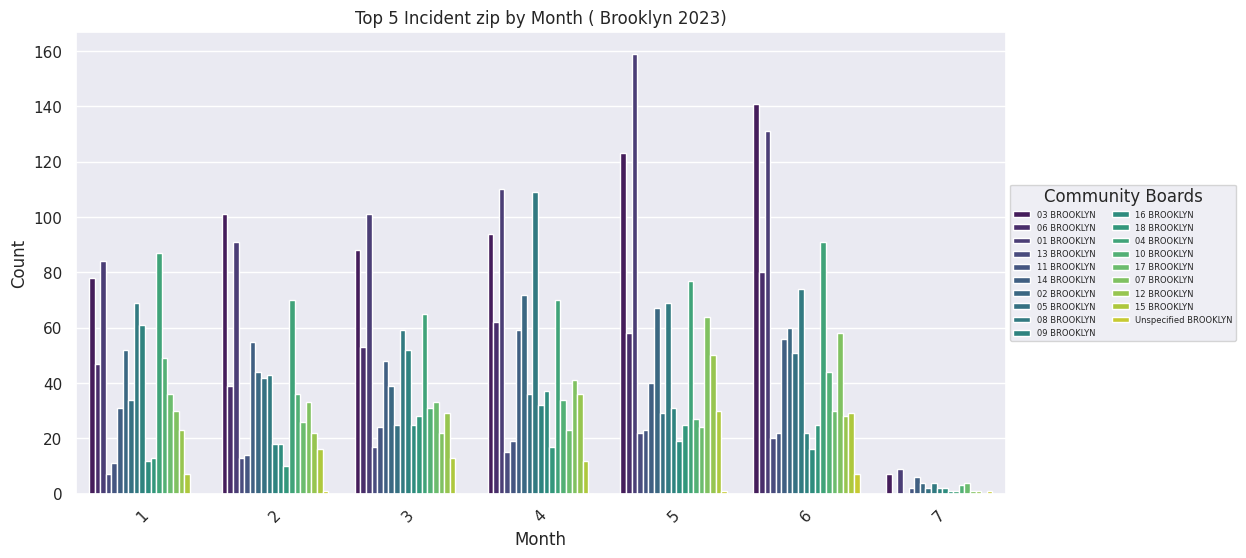

In [83]:
# Group the data and retrieve the top incident address by year, quarter, month, created_date, weekday, community_board, incident_zip, and incident_address
top_bk= BKN_rats.groupby(['year', 'quarter', 'month', 'created_date', 'weekday', 'community_board', 'incident_zip','incident_address'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

# Reset the index to convert the series to a DataFrame
filtered_top_df = top_bk.reset_index()

# Filter the data for the years 2020-2023
filtered_data = filtered_top_df[filtered_top_df['year'].isin([2023])]

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot
sns.countplot(data=filtered_data, x='month', hue='community_board', palette='viridis')

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Community district counts by Month ( Brooklyn 2023)')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6, ncol=2, title='Community Boards')

# Display the plot
plt.show()

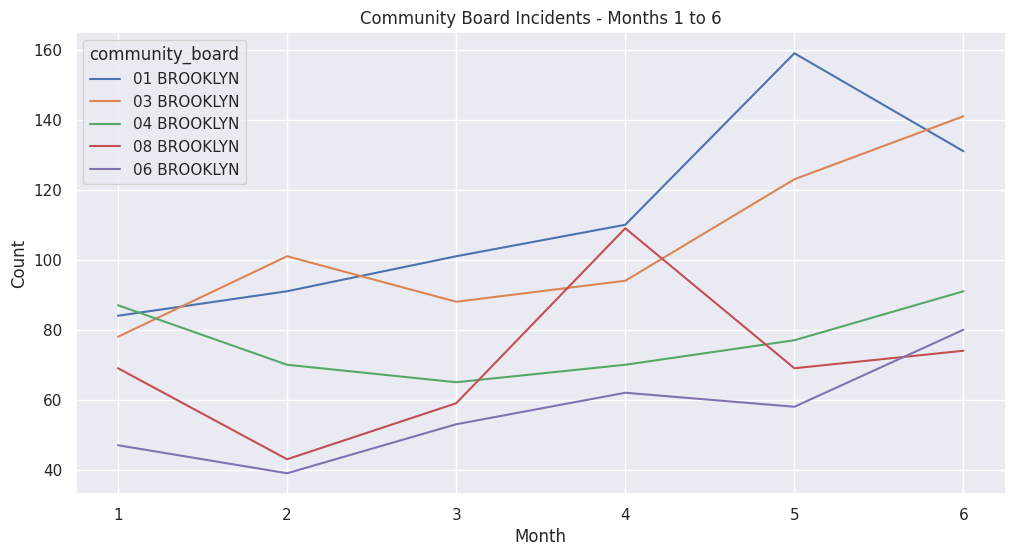

In [88]:
# Filter the data for months 1 to 6
filtered_data_months = filtered_data[filtered_data['month'].between(1, 6)]

# Group the filtered data by month and community board and calculate the incident count
grouped_data = filtered_data_months.groupby(['month', 'community_board']).size().unstack()

# Calculate the total incidents for each community board and sort in descending order
total_incidents = grouped_data.sum().sort_values(ascending=False)

# Select the top 5 community boards with the most incidents
top_5_community_boards = total_incidents.head(5).index

# Filter the grouped data for the top 5 community boards and reorder the columns
top_5_data = grouped_data[top_5_community_boards]

# Create a bar plot
top_5_data.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Community Board Incidents - Months 1 to 6')

plt.show()


Values...these need rethought

In [75]:
# rat_locations = set(rat1[['longitude', 'latitude', 'the_geom', 'modztca']])

In [76]:
# dsny_locations = set(dsny1[['Longitude', 'Latitude', 'multipolygon-1','post_code']])

# Exports

In [78]:
# Export Selected Columns to CSV File
#column_names = ['', '','']
#df.to_csv("c:/tmp/courses.csv",index=False, columns=column_names)

# Writes Content to CSV File

In [79]:
# BRX_dsny {BRX_dsny}
# brx_rats {brx_rats}
# BKN_dsny {BKN_dsny}
# bkn_rats {bkn_rats}
# NYC_dsny {NYC_dsny}
# nyc_rats {nyc_rats}
# QNS_dsny {QNS_dsny}
# qns_rats {qns_rats}
# SI_dsny  {SI_dsny}
# si_rats  {si_rats}

##Print to file

In [80]:
# BRX_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BRX_dsny.csv")
# BRX_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BRX_rats.csv")
# BKN_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BKN_dsny.csv")
# BKN_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BKN_rats.csv")
# NYC_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/NYC_dsny.csv")
# NYC_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/NYC_rats.csv")
# QNS_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/QNS_dsny.csv")
# QNS_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/QNS_rats.csv")
# SI_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/SI_dsny.csv")
# SI_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/SI_rats.csv")

# rat1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rat1.csv")
# dsny1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/dsny1.csv")